In [82]:
import pandas as pd
import numpy as np

from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error


import warnings; warnings.simplefilter('ignore')

ModuleNotFoundError: No module named 'pandas.tools'

In [83]:
# visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
df_bitcoin = pd.read_csv("Bitcoin_data.csv", index_col = 0)
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'])
df_bitcoin.set_index('Date', inplace=True)
df_bitcoin.head(5)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2019-07-15,10257.84,11052.77,9992.01,10895.09,"25,384,047,207","194,147,627,475"
2019-07-14,11381.02,11451.20,10234.58,10256.06,"22,486,000,001","182,741,933,552"
2019-07-13,11813.13,11841.96,10908.48,11392.38,"21,042,616,384","202,968,191,001"
2019-07-12,11354.30,11905.49,11179.14,11815.99,"23,534,692,797","210,494,417,832"
2019-07-11,12139.71,12144.62,11158.92,11358.66,"28,595,327,690","202,324,174,692"


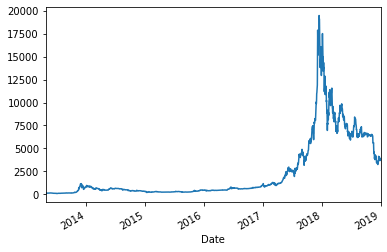

In [71]:
df_bitcoin_train = df_bitcoin.loc[:"2019-01-1",["Close"]]
df_bitcoin_test = df_bitcoin.loc["2019-01-2":,["Close"]]
df_bitcoin_train['Close'].plot()

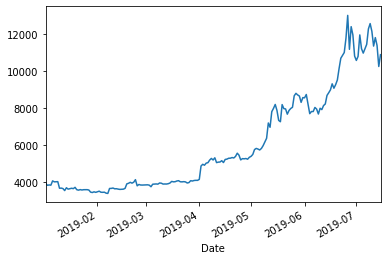

In [72]:
df_bitcoin_test['Close'].plot()

In [73]:
df_bitcoin_train.tail()

,Close
Date,
2013-05-01,116.99
2013-04-30,139.00
2013-04-29,144.54
2013-04-28,134.21
2013-04-28,134.21


In [74]:
df_bitcoin_test

,Close
Date,
2019-07-15,10895.09
2019-07-14,10256.06
2019-07-13,11392.38
2019-07-12,11815.99
2019-07-11,11358.66
...,...
2019-01-06,4076.63
2019-01-05,3845.19
2019-01-04,3857.72


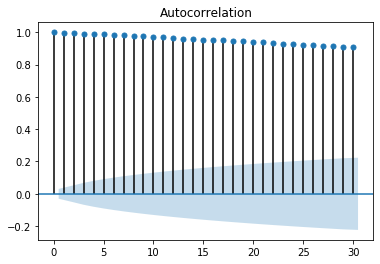

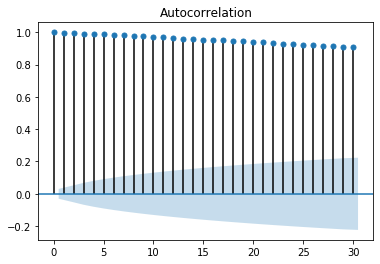

In [75]:
plot_acf(df_bitcoin_train, lags=30)

In [80]:
model = sm.tsa.ARIMA(df_bitcoin_train, (1, 0, 0)).fit()

predictions = model.predict(
    '2019-02-09',
    '2019-02-11',
    dynamic=True, 
)

predictions

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [81]:
print("Mean absolute error: ", mean_absolute_error(df_bitcoin_test, predictions))
model.summary()



NameError: name 'predictions' is not defined

In [78]:
model = sm.tsa.ARIMA(df_bitcoin_train, (1, 0, 1)).fit()

predictions = model.predict(
    '2019-02-09',
    '2019-02-11',
    dynamic=True, 
)

predictions

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [ ]:
print("Mean absolute error: ", mean_absolute_error(df_bitcoin_test, predictions))
model.summary()

In [79]:
model = sm.tsa.ARIMA(df_bitcoin_train, (1, 1, 1)).fit()

predictions = model.predict(
    '2019-02-09',
    '2019-02-11',
    dynamic=False, 
    typ='levels'
)

predictions

KeyError: 'only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices'

In [ ]:
print("Mean absolute error: ", mean_absolute_error(df_bitcoin_test, predictions))
model.summary()